In [5]:
import numpy as np
import pandas as pd
import seaborn as sns


In [6]:
Solar_data = pd.read_csv('SolarPrediction.csv')

missing_values = Solar_data.isnull().sum()

Solar_data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


array([[<Axes: title={'center': 'Radiation'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'WindDirection(Degrees)'}>],
       [<Axes: title={'center': 'Speed'}>, <Axes: >]], dtype=object)

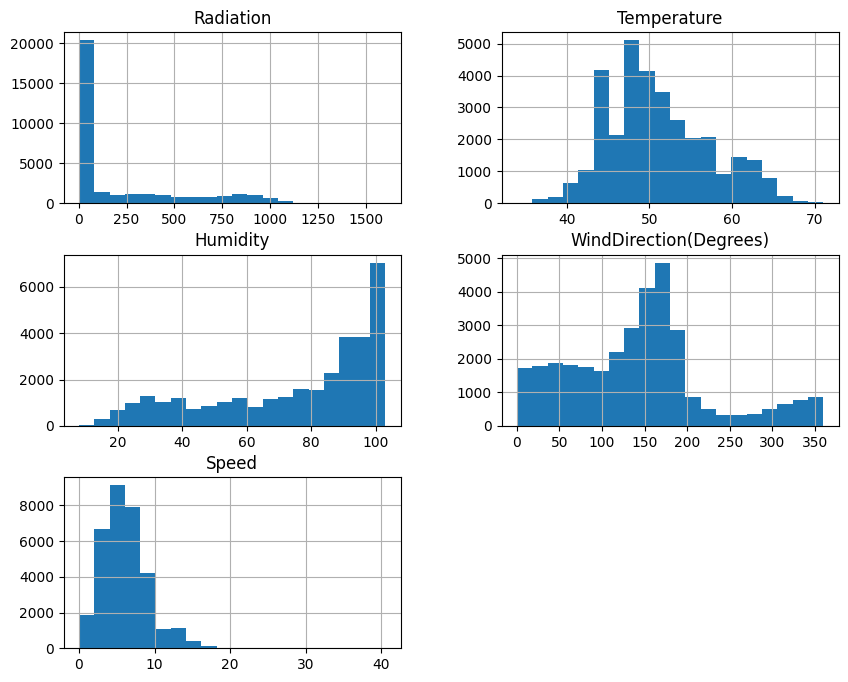

In [7]:
import matplotlib.pyplot as plt

Solar_data[['Radiation', 'Temperature', 'Humidity', 'WindDirection(Degrees)','Speed']].hist(bins=20, figsize=(10, 8))


In [8]:
Solar_data['UnixTime'] = pd.to_datetime(Solar_data['UNIXTime'], unit='s')
Solar_data['Year']= Solar_data['UnixTime'].dt.year
Solar_data['Month']= Solar_data['UnixTime'].dt.month
Solar_data['Day']= Solar_data['UnixTime'].dt.day
Solar_data['Hour']= Solar_data['UnixTime'].dt.hour
Solar_data['Hour'].head(10000)


0        9
1        9
2        9
3        9
4        9
        ..
9995    10
9996    10
9997    10
9998    10
9999    10
Name: Hour, Length: 10000, dtype: int32

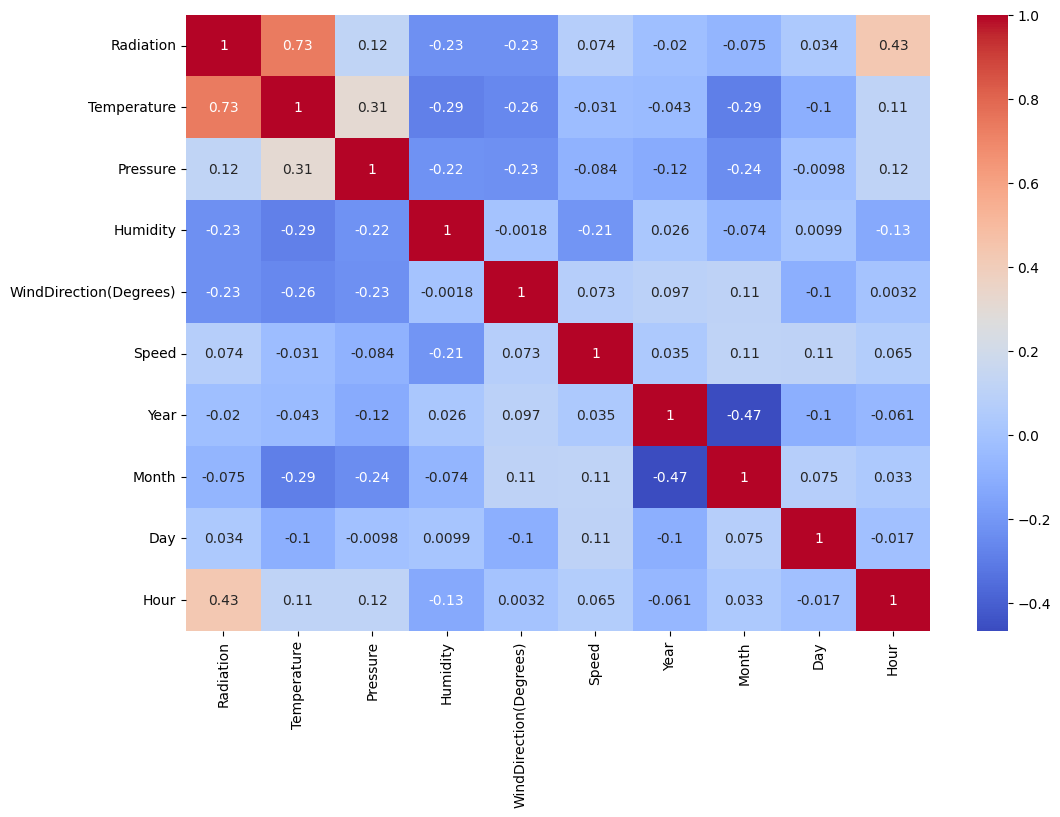

In [9]:
import seaborn as sns

df=Solar_data[['Radiation','Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed','Year','Month','Day','Hour']]
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.show()


In [10]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
x= Solar_data[['Temperature','Pressure','Speed','Day','Hour']]
y = Solar_data['Radiation']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [11]:
# Import the necessary libraries
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [12]:
from sklearn.svm import SVR

# Initialize the SVR model with a polynomial kernel
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
# Fit the model on the scaled training data
svr.fit(x_train, y_train)


y_pred = svr.predict(x_test)


In [13]:
#import the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the mean_squared_error

mse = mean_squared_error(y_test, y_pred)

# Calculate the mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

# Calculate the r2 score

r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)


Mean Squared Error: 17070.98340850414
Mean Absolute Error: 67.69063988171244
R2 Score: 0.8281677554332464


In [67]:
new_data = pd.DataFrame({
    'Temperature': [40.0, 35.0, 40.0],  # Example temperatures
    'Pressure': [30.0, 30.5, 29.8],     # Example pressure readings
    'Speed': [5.0, 6.0, 3.0],           # Example wind speed
    'Day': [15, 16, 17],                # Example days of the month
    'Hour': [12, 14, 16]                # Example hours of the day
})

new_data_scaled = scaler.transform(new_data)

# Make predictions on the new data using the trained model
new_predictions = svr.predict(new_data_scaled)

print(f'Predictions for new data: {new_predictions}')

Predictions for new data: [456.16275048 456.16275048 456.16275048]


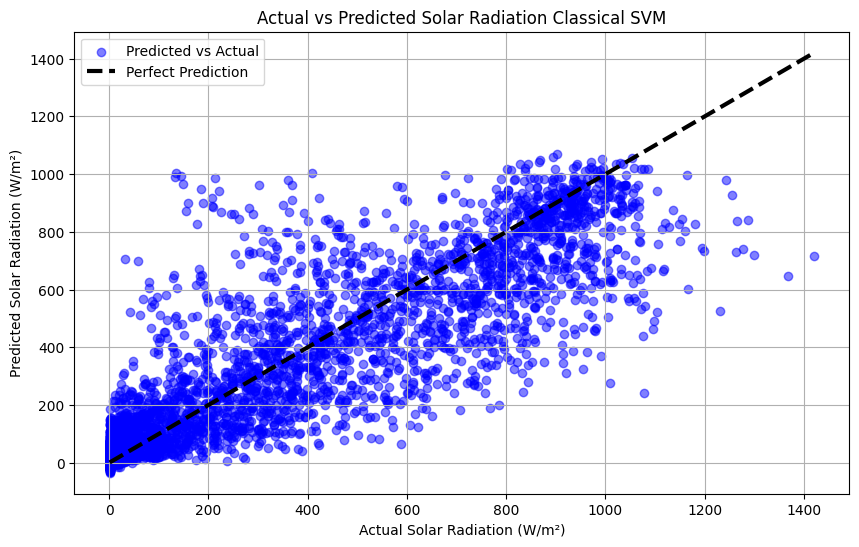

In [14]:
import matplotlib.pyplot as plt

# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Perfect Prediction')

# Labels and title
plt.title('Actual vs Predicted Solar Radiation Classical SVM')
plt.xlabel('Actual Solar Radiation (W/m²)')
plt.ylabel('Predicted Solar Radiation (W/m²)')
plt.legend()
plt.grid(True)
plt.show()


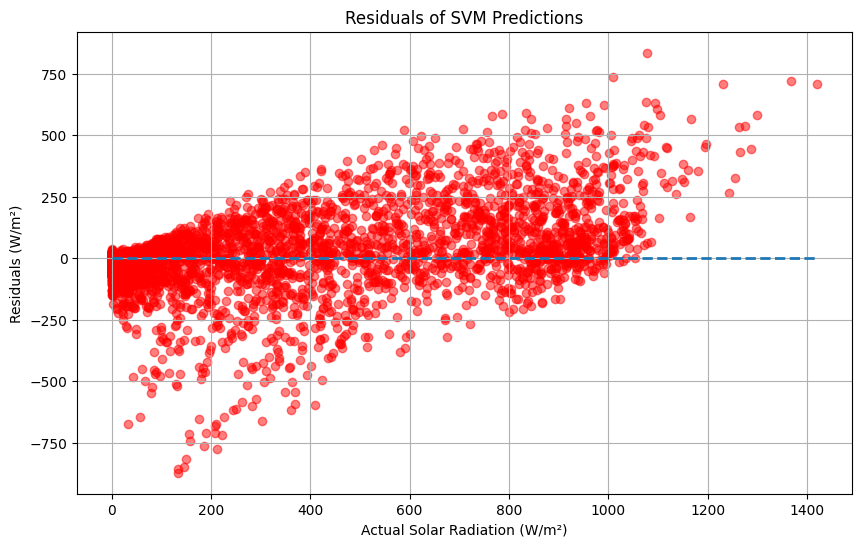

In [15]:
# Calculate residuals
residuals = y_test - y_pred

# Scatter plot of residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='red')
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), linestyles='dashed', lw=2)

# Labels and title
plt.title('Residuals of SVM Predictions')
plt.xlabel('Actual Solar Radiation (W/m²)')
plt.ylabel('Residuals (W/m²)')
plt.grid(True)
plt.show()


In [66]:
import pennylane as qml
import tensorflow as tf  # TensorFlow for GPU acceleration
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pennylane.kernels import kernel_matrix

# Use the same features: Temperature, Pressure, Speed, Day, Hour
X = Solar_data[['Temperature', 'Pressure', 'Speed', 'Day', 'Hour']]
y = Solar_data['Radiation']

X_subset = X.head(500)
y_subset = y.head(500)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Number of features determines the number of qubits
num_qubits = X_train_scaled.shape[1]

# Use a TensorFlow-based quantum device
dev = qml.device('default.qubit', wires=num_qubits)

# Quantum embedding circuit using TensorFlow
@qml.qnode(dev, interface="tf")
def quantum_embedding(x):
    for i in range(num_qubits):
        qml.RX(x[i], wires=i)
    return [qml.expval(qml.PauliZ(i)) for i in range(num_qubits)]

# Custom quantum kernel using TensorFlow
def quantum_kernel(x1, x2):
    return np.dot(quantum_embedding(tf.convert_to_tensor(x1)), quantum_embedding(tf.convert_to_tensor(x2)))

# Use the kernel_matrix function from PennyLane to compute the kernel
K_train = kernel_matrix(X_train_scaled, X_train_scaled, quantum_kernel)
K_test = kernel_matrix(X_test_scaled, X_train_scaled, quantum_kernel)

class QSVR:
    def __init__(self, kernel_matrix):
        self.kernel_matrix = kernel_matrix
        self.alpha = None

    def fit(self, y):
        # Fit the model using a linear combination of support vectors
        self.alpha = np.linalg.solve(self.kernel_matrix + 1e-10 * np.eye(len(y)), y)

    def predict(self, X):
        # Compute the kernel matrix between new data and the training data
        K = kernel_matrix(X, X_train_scaled, quantum_kernel)
        return np.dot(K, self.alpha)

# Train QSVR model
qsvr = QSVR(K_train)
qsvr.fit(y_train)

# Make predictions on the test set
y_pred = qsvr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (QSVM): {mse:.2f}')
print(f'R² Score (QSVM): {r2:.2f}')
print(f'Mean Absolute Error (QSVM): {mae:.2f}')


KeyboardInterrupt: 

In [68]:
new_data = pd.DataFrame({
    'Temperature': [40.0, 35.0, 40.0],  # Example temperatures
    'Pressure': [30.0, 30.5, 29.8],     # Example pressure readings
    'Speed': [5.0, 6.0, 3.0],           # Example wind speed
    'Day': [15, 16, 17],                # Example days of the month
    'Hour': [12, 14, 16]                # Example hours of the day
})

new_data_scaled = scaler.transform(new_data)

# Make predictions on the new data using the trained model
new_predictions = qsvr.predict(new_data_scaled)

print(f'Predictions for new data: {new_predictions}')

Predictions for new data (QSVM): [1.223,1.555.1.334]
